In [25]:
import urllib.request

client_id = "vDgE9B1VNVWLh5cXI_63"
client_secret = "X2Fbg2158i"

In [29]:
def gen_search_url(api_node, search_text, start_num, disp_num):
    base = "https://openapi.naver.com/v1/search"
    node = "/" + api_node + ".json"
    param_query = "?query=" + urllib.parse.quote(search_text)
    param_start = "&start=" + str(start_num)
    param_disp = "&display=" + str(disp_num)
    
    return base + node + param_query + param_start + param_disp

print(gen_search_url("book", "파이썬", 10, 3))

https://openapi.naver.com/v1/search/book.json?query=%ED%8C%8C%EC%9D%B4%EC%8D%AC&start=10&display=3


In [32]:
import json
import datetime

def get_result_onpage(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    
    response = urllib.request.urlopen(request)
    
    print("[%s] Url Request Success" % datetime.datetime.now())
    
    return json.loads(response.read().decode('utf-8'))

In [33]:
url = gen_search_url("book", "파이썬", 10, 3)
one_result = get_result_onpage(url)

[2020-11-23 16:31:40.850781] Url Request Success


In [34]:
one_result

{'lastBuildDate': 'Mon, 23 Nov 2020 16:31:31 +0900',
 'total': 1157,
 'start': 10,
 'display': 3,
 'items': [{'title': 'Do it! 첫 <b>파이썬</b> (게임하듯 배우는 나의 첫 프로그래밍 책)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=16324192',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/163/241/16324192.jpg?type=m1&udate=20200930',
   'author': '엘리스 코딩',
   'price': '14000',
   'discount': '12600',
   'publisher': '이지스퍼블리싱',
   'pubdate': '20200410',
   'isbn': '1163031569 9791163031567',
   'description': '왕초보 맞춤 <b>파이썬</b> 입문서초등 고학년부터 필수인 코딩, 주인공 ‘엘리스 토끼’와 함께 게임하듯 배우세요. 176가지 그림과 45가지 코딩 문제를 풀다... 마지막 과제인 ‘점심 메뉴 추첨기’ 프로그램까지 만들면 ‘<b>파이썬</b> 이수증’도 드립니다. 제대로 설계된 코딩 교육 콘텐츠를 찾는 학생·학부모·선생님은... '},
  {'title': '<b>파이썬</b> for Beginner (쉽고 빠르게 익히는 프로그래밍의 기본 원리)',
   'link': 'http://book.naver.com/bookdb/book_detail.php?bid=15871779',
   'image': 'https://bookthumb-phinf.pstatic.net/cover/158/717/15871779.jpg?type=m1&udate=20200912',
   'author': '우재남',
   'price': '23000',
   'discount'

In [35]:
def delete_tag(input_str):
    input_str = input_str.replace("<b>", "")
    input_str = input_str.replace("</b>", "")
    
    return input_str

In [41]:
import pandas as pd

def get_fields(json_data):
    title = [delete_tag(each['title']) for each in json_data['items']]
    link = [each['link'] for each in json_data['items']]
    price = [each['price'] for each in json_data['items']]
    publisher = [each['publisher'] for each in json_data['items']]   
    isbn = [each['isbn'].split()[0] for each in json_data['items']]    
    
    result_pd = pd.DataFrame({"title" : title, "price" : price, "isbn" : isbn, "link" : link, "publisher" : publisher},
                             columns = ['title', 'price', 'publisher', 'isbn', 'link'])
    
    return result_pd

In [42]:
url = gen_search_url('book', '파이썬', 10, 3)
json_result = get_result_onpage(url)
pd_result = get_fields(json_result)
pd_result

[2020-11-23 16:40:38.964071] Url Request Success


title  price publisher  \
0               Do it! 첫 파이썬 (게임하듯 배우는 나의 첫 프로그래밍 책)  14000   이지스퍼블리싱   
1         파이썬 for Beginner (쉽고 빠르게 익히는 프로그래밍의 기본 원리)  23000    한빛아카데미   
2  혼자 공부하는 첫 프로그래밍 with 파이썬 (1:1 과외하듯 배우는 왕초보 코딩 ...  17000     한빛미디어   

         isbn                                               link  
0  1163031569  http://book.naver.com/bookdb/book_detail.php?b...  
1  1156644666  http://book.naver.com/bookdb/book_detail.php?b...  
2  1162243031  http://book.naver.com/bookdb/book_detail.php?b...

In [43]:
result_book = []

for n in range(1,1000,100):
    url = gen_search_url('book', '파이썬', n, 100)
    json_result = get_result_onpage(url)
    pd_result = get_fields(json_result)
    
    result_book.append(pd_result)
    
result_book = pd.concat(result_book)

[2020-11-23 16:48:58.742227] Url Request Success
[2020-11-23 16:48:58.933869] Url Request Success
[2020-11-23 16:48:59.050499] Url Request Success
[2020-11-23 16:48:59.132856] Url Request Success
[2020-11-23 16:48:59.219305] Url Request Success
[2020-11-23 16:48:59.572317] Url Request Success
[2020-11-23 16:48:59.708541] Url Request Success
[2020-11-23 16:48:59.826406] Url Request Success
[2020-11-23 16:49:00.021720] Url Request Success
[2020-11-23 16:49:00.119847] Url Request Success


In [44]:
result_book.reset_index(drop=True, inplace=True)
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      1000 non-null   object
 1   price      1000 non-null   object
 2   publisher  1000 non-null   object
 3   isbn       1000 non-null   object
 4   link       1000 non-null   object
dtypes: object(5)
memory usage: 39.2+ KB


In [45]:
result_book['price'] = result_book['price'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [46]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "https://book.naver.com/bookdb/book_detail.nhn?bid=14922211"
page = urlopen(url)
soup = BeautifulSoup(page, 'html.parser')
soup

<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
책정보, 파이썬 라이브러리를 활용한 데이터 분석 : 네이버 책</title>
<meta content="article" property="og:type"/>
<meta content="파이썬 라이브러리를 활용한 데이터 분석" property="og:title"/>
<meta content="http://book.naver.com/bookdb/book_detail.nhn?bid=14922211" property="og:url"/>
<meta content="https://bookthumb-phinf.pstatic.net/cover/149/222/14922211.jpg?type=m5" property="og:image"/>
<meta content="빅데이터 분석에 관한 가장 완벽한 교재!이 책은 NUMPY, PANDAS, MATPLOTLIB, IPYTHON, JUPYTER 등 다양한 파이썬 라이브러리를 사용해서 효과적으로 데이터를 분석하는 방법을 알려준다. PANDAS의 새로운 기능뿐만 아니라 메모리 사용량을 줄이고 성능을 개선하는 고급 사용법까지 다룬다. 또한 모델링 도구인 STATSMODELS와 SCIKIT-LEARN 라이브러리도 소개한다. 연대별 이름 통계 자료, 미 대선 데이터베이스 자료 등 실사례로 따라 하다 보면 어느덧 여러분도 데이터에 알맞게 접근하고 효과적으로 분석하는 전문가가 될 것이다." property="og:description"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버 책" property="og:article:author"/>
<meta co

In [49]:
soup.find_all(class_="book_info")

[<div class="book_info">
 <h2><a class="N=a:bil.title,i:98000001_000000000000000000E3B1E3" href="/bookdb/book_detail.nhn?bid=14922211">파이썬 라이브러리를 활용한 데이터 분석 <span>영화 평점, 이름 통계, 선거 데이터 등 실사례 사용</span></a></h2>
 <div class="thumb type_end">
 <div class="thumb_type">
 <a class="N=a:bil.image,i:98000001_000000000000000000E3B1E3" href="javascript:showLayerBookImage();">
 <img alt="파이썬 라이브러리를 활용한 데이터 분석" onerror="emptyImg(this, 'm140')" src="https://bookthumb-phinf.pstatic.net/cover/149/222/14922211.jpg?type=m140&amp;udate=20201111"/>
 <span class="mask"><span class="bg1"></span><span class="bg2"></span></span>
 </a>
 </div>
 </div>
 <div class="book_info_inner">
 <div class="txt_desc">
 <a class="N=a:bil.point,i:98000001_000000000000000000E3B1E3" href="/bookdb/review.nhn?bid=14922211" id="txt_desc_point">
 <div class="review_point2"><span style="width:0.0%;">별점</span></div>
 <strong>0.0<span class="blind">점</span></strong> <span class="bar">|</span> 네티즌리뷰 <strong> 2</strong><span class="cnt

In [51]:
tmp = soup.find_all(class_='book_info')[0].get_text()
tmp

'\n파이썬 라이브러리를 활용한 데이터 분석\xa0영화 평점, 이름 통계, 선거 데이터 등 실사례 사용\n\n\n\n\n\n\n\n\n\n\n\n별점\n0.0점 | 네티즌리뷰  2건\n\n\n저자 웨스 맥키니|역자 김영근|한빛미디어\n|2019.05.20\n원제 Python for data analysis\n페이지 664|ISBN  9791162241905|판형 규격외 변형\n\n\n도서\n31500원\n35000원\n-10%\n\n\nebook 28000 | 25200\n25200원\n28000원\n-10%\n\n\n\n\n\n가격정보\n\n\n\n\n\n\n\n\n\n\nISBN이란?\n국제표준도서번호(International Standard Book Number)로서, 국제적으로 표준화된방법에 따라 전세계에서 생산되는 도서에부여된 고유번호를 말합니다.\n\n\n\n'

In [52]:
import re

tmp = soup.find_all(class_='book_info')[0].get_text()
result = re.search('페이지\s+\d+', tmp)

result.group()

'페이지 664'

In [53]:
import re
import numpy as np

def get_page_num(soup):
    tmp = soup.find_all(class_='book_info')[0].get_text()
    
    try:
        result = re.search('페이지\s+\d+', tmp).group()
        return result.split()[1]
    except:
        print("==> Error in get_page_num!!")
        return np.nan
    
get_page_num(soup)
    

'664'

In [54]:
import time

page_num_col = []

for url in result_book['link']:
    print(url)
    print(time.time())
    
    try:
        page_num = get_page_num(BeautifulSoup(urlopen(url), 'html.parser'))
        page_num_col.append(page_num)
        
    except:
        print("==> Error in urlopen!!")
        page_num_col.append(np.nan)
        
    print(len(page_num_col))
    time.sleep(0.5)
    
result_book['page_num'] = page_num_col

http://book.naver.com/bookdb/book_detail.php?bid=16439154
1606118290.129083
1
http://book.naver.com/bookdb/book_detail.php?bid=16406247
1606118291.0744052
2
http://book.naver.com/bookdb/book_detail.php?bid=15028688
1606118291.951699
3
http://book.naver.com/bookdb/book_detail.php?bid=15052904
1606118292.974189
4
http://book.naver.com/bookdb/book_detail.php?bid=16238302
1606118294.072116
5
http://book.naver.com/bookdb/book_detail.php?bid=16437083
1606118295.0983071
6
http://book.naver.com/bookdb/book_detail.php?bid=14820571
1606118296.132123
7
http://book.naver.com/bookdb/book_detail.php?bid=14126163
1606118297.211284
8
http://book.naver.com/bookdb/book_detail.php?bid=16778336
1606118298.4002502
9
http://book.naver.com/bookdb/book_detail.php?bid=16324192
1606118300.2332559
10
http://book.naver.com/bookdb/book_detail.php?bid=15871779
1606118301.318858
11
http://book.naver.com/bookdb/book_detail.php?bid=16385280
1606118302.361571
12
http://book.naver.com/bookdb/book_detail.php?bid=14922892

104
http://book.naver.com/bookdb/book_detail.php?bid=15655682
1606118403.884228
105
http://book.naver.com/bookdb/book_detail.php?bid=11659351
1606118404.6600041
106
http://book.naver.com/bookdb/book_detail.php?bid=16261477
1606118405.577696
107
http://book.naver.com/bookdb/book_detail.php?bid=16897193
1606118406.365898
==> Error in get_page_num!!
108
http://book.naver.com/bookdb/book_detail.php?bid=14649782
1606118407.230885
109
http://book.naver.com/bookdb/book_detail.php?bid=15371024
1606118408.266158
110
http://book.naver.com/bookdb/book_detail.php?bid=14261060
1606118409.284847
111
http://book.naver.com/bookdb/book_detail.php?bid=16030770
1606118410.297018
112
http://book.naver.com/bookdb/book_detail.php?bid=10882789
1606118411.222327
113
http://book.naver.com/bookdb/book_detail.php?bid=16388863
1606118412.013605
114
http://book.naver.com/bookdb/book_detail.php?bid=12231444
1606118412.952134
115
http://book.naver.com/bookdb/book_detail.php?bid=16214388
1606118413.875984
116
http://

206
http://book.naver.com/bookdb/book_detail.php?bid=15369104
1606118509.9484859
207
http://book.naver.com/bookdb/book_detail.php?bid=11637415
1606118510.948765
208
http://book.naver.com/bookdb/book_detail.php?bid=13428069
1606118511.924823
209
http://book.naver.com/bookdb/book_detail.php?bid=16110021
1606118512.9390562
210
http://book.naver.com/bookdb/book_detail.php?bid=14365321
1606118513.978893
211
http://book.naver.com/bookdb/book_detail.php?bid=16313682
1606118514.746065
212
http://book.naver.com/bookdb/book_detail.php?bid=14381018
1606118515.578254
213
http://book.naver.com/bookdb/book_detail.php?bid=12799891
1606118516.4728801
214
http://book.naver.com/bookdb/book_detail.php?bid=16293168
1606118517.53892
215
http://book.naver.com/bookdb/book_detail.php?bid=15261531
1606118518.35635
216
http://book.naver.com/bookdb/book_detail.php?bid=15029059
1606118519.3240619
217
http://book.naver.com/bookdb/book_detail.php?bid=13975405
1606118520.281703
218
http://book.naver.com/bookdb/book_

308
http://book.naver.com/bookdb/book_detail.php?bid=9509682
1606118614.049481
309
http://book.naver.com/bookdb/book_detail.php?bid=13484482
1606118614.9082081
310
http://book.naver.com/bookdb/book_detail.php?bid=16109063
1606118615.924597
311
http://book.naver.com/bookdb/book_detail.php?bid=10503671
1606118617.5288231
312
http://book.naver.com/bookdb/book_detail.php?bid=7145997
1606118618.9710531
313
http://book.naver.com/bookdb/book_detail.php?bid=16331909
1606118620.59901
314
http://book.naver.com/bookdb/book_detail.php?bid=12114217
1606118622.116544
315
http://book.naver.com/bookdb/book_detail.php?bid=9531723
1606118623.176209
316
http://book.naver.com/bookdb/book_detail.php?bid=12225269
1606118624.2026722
317
http://book.naver.com/bookdb/book_detail.php?bid=11627834
1606118625.154349
318
http://book.naver.com/bookdb/book_detail.php?bid=13299075
1606118626.194724
319
http://book.naver.com/bookdb/book_detail.php?bid=12254194
1606118626.99662
320
http://book.naver.com/bookdb/book_det

406
http://book.naver.com/bookdb/book_detail.php?bid=11912927
1606118718.0192451
407
http://book.naver.com/bookdb/book_detail.php?bid=12542762
1606118719.099891
408
http://book.naver.com/bookdb/book_detail.php?bid=12010653
1606118720.275543
409
http://book.naver.com/bookdb/book_detail.php?bid=9832716
1606118721.328423
410
http://book.naver.com/bookdb/book_detail.php?bid=15974197
1606118722.3759701
411
http://book.naver.com/bookdb/book_detail.php?bid=13642670
1606118723.366504
==> Error in get_page_num!!
412
http://book.naver.com/bookdb/book_detail.php?bid=13606511
1606118724.434997
413
http://book.naver.com/bookdb/book_detail.php?bid=11956991
1606118725.487943
414
http://book.naver.com/bookdb/book_detail.php?bid=13128617
1606118726.408334
==> Error in get_page_num!!
415
http://book.naver.com/bookdb/book_detail.php?bid=11068317
1606118727.438497
416
http://book.naver.com/bookdb/book_detail.php?bid=12174889
1606118728.5174022
417
http://book.naver.com/bookdb/book_detail.php?bid=12035489


506
http://book.naver.com/bookdb/book_detail.php?bid=15301644
1606118833.9521012
507
http://book.naver.com/bookdb/book_detail.php?bid=13608509
1606118835.004853
508
http://book.naver.com/bookdb/book_detail.php?bid=11477892
1606118836.119248
509
http://book.naver.com/bookdb/book_detail.php?bid=15620279
1606118837.191492
510
http://book.naver.com/bookdb/book_detail.php?bid=8819504
1606118838.214832
511
http://book.naver.com/bookdb/book_detail.php?bid=12538653
1606118839.3085492
512
http://book.naver.com/bookdb/book_detail.php?bid=15654371
1606118840.756963
513
http://book.naver.com/bookdb/book_detail.php?bid=12671408
1606118841.6673012
514
http://book.naver.com/bookdb/book_detail.php?bid=10976142
1606118842.720586
515
http://book.naver.com/bookdb/book_detail.php?bid=7821203
1606118843.7642019
516
http://book.naver.com/bookdb/book_detail.php?bid=14565591
1606118844.835449
517
http://book.naver.com/bookdb/book_detail.php?bid=13347363
1606118845.8499808
518
http://book.naver.com/bookdb/book

609
http://book.naver.com/bookdb/book_detail.php?bid=16362170
1606118945.2398348
610
http://book.naver.com/bookdb/book_detail.php?bid=12307278
1606118946.287384
611
http://book.naver.com/bookdb/book_detail.php?bid=16363359
1606118947.454339
612
http://book.naver.com/bookdb/book_detail.php?bid=16291510
1606118948.359823
613
http://book.naver.com/bookdb/book_detail.php?bid=16391228
1606118949.421463
614
http://book.naver.com/bookdb/book_detail.php?bid=16404999
1606118950.6088052
615
http://book.naver.com/bookdb/book_detail.php?bid=13540082
1606118951.6471272
616
http://book.naver.com/bookdb/book_detail.php?bid=15620572
1606118952.7302039
617
http://book.naver.com/bookdb/book_detail.php?bid=14741383
1606118953.733591
618
http://book.naver.com/bookdb/book_detail.php?bid=16367174
1606118954.8184829
619
http://book.naver.com/bookdb/book_detail.php?bid=16365628
1606118955.847629
620
http://book.naver.com/bookdb/book_detail.php?bid=16270882
1606118956.732404
621
http://book.naver.com/bookdb/bo

711
http://book.naver.com/bookdb/book_detail.php?bid=14412476
1606119055.2714272
712
http://book.naver.com/bookdb/book_detail.php?bid=11912125
1606119056.3451252
713
http://book.naver.com/bookdb/book_detail.php?bid=10859533
1606119057.555242
714
http://book.naver.com/bookdb/book_detail.php?bid=14467849
1606119058.45436
715
http://book.naver.com/bookdb/book_detail.php?bid=15370657
1606119059.5168169
716
http://book.naver.com/bookdb/book_detail.php?bid=16121345
1606119060.5459871
717
http://book.naver.com/bookdb/book_detail.php?bid=9414612
1606119061.602114
718
http://book.naver.com/bookdb/book_detail.php?bid=12768635
1606119062.66164
719
http://book.naver.com/bookdb/book_detail.php?bid=13465439
1606119063.711637
720
http://book.naver.com/bookdb/book_detail.php?bid=6977446
1606119064.8772721
721
http://book.naver.com/bookdb/book_detail.php?bid=14488509
1606119065.971669
722
http://book.naver.com/bookdb/book_detail.php?bid=16330922
1606119066.8547351
723
http://book.naver.com/bookdb/book_

814
http://book.naver.com/bookdb/book_detail.php?bid=16237784
1606119170.821766
815
http://book.naver.com/bookdb/book_detail.php?bid=15043446
1606119171.708179
816
http://book.naver.com/bookdb/book_detail.php?bid=13416225
1606119172.734282
817
http://book.naver.com/bookdb/book_detail.php?bid=15703760
1606119173.8003561
818
http://book.naver.com/bookdb/book_detail.php?bid=12723491
1606119174.818785
819
http://book.naver.com/bookdb/book_detail.php?bid=13416226
1606119176.031745
820
http://book.naver.com/bookdb/book_detail.php?bid=14257793
1606119177.096609
821
http://book.naver.com/bookdb/book_detail.php?bid=8814363
1606119178.004779
822
http://book.naver.com/bookdb/book_detail.php?bid=11323550
1606119179.1869571
823
http://book.naver.com/bookdb/book_detail.php?bid=11637588
1606119180.11994
824
http://book.naver.com/bookdb/book_detail.php?bid=7436299
1606119181.295882
825
http://book.naver.com/bookdb/book_detail.php?bid=13999213
1606119182.203639
826
http://book.naver.com/bookdb/book_det

914
http://book.naver.com/bookdb/book_detail.php?bid=10462873
1606119283.258708
915
http://book.naver.com/bookdb/book_detail.php?bid=13975256
1606119285.331946
==> Error in get_page_num!!
916
http://book.naver.com/bookdb/book_detail.php?bid=11777815
1606119286.9346392
917
http://book.naver.com/bookdb/book_detail.php?bid=10454818
1606119288.4953332
918
http://book.naver.com/bookdb/book_detail.php?bid=7342676
1606119289.298802
919
http://book.naver.com/bookdb/book_detail.php?bid=7129353
1606119290.202229
920
http://book.naver.com/bookdb/book_detail.php?bid=11068524
1606119291.390201
921
http://book.naver.com/bookdb/book_detail.php?bid=11090476
1606119292.290126
922
http://book.naver.com/bookdb/book_detail.php?bid=17468028
1606119293.3269188
923
http://book.naver.com/bookdb/book_detail.php?bid=7518875
1606119294.391754
924
http://book.naver.com/bookdb/book_detail.php?bid=7394494
1606119295.4546618
925
http://book.naver.com/bookdb/book_detail.php?bid=12692319
1606119296.49942
926
http://bo

In [55]:
len(page_num_col)

1000

In [56]:
page_num_col

['604',
 '724',
 '460',
 '360',
 '648',
 '296',
 '308',
 '200',
 '310',
 '268',
 '504',
 '336',
 '644',
 '664',
 '460',
 '320',
 '640',
 '366',
 '576',
 '292',
 '424',
 '488',
 '706',
 '480',
 '420',
 '360',
 '744',
 '776',
 '364',
 '504',
 '400',
 '280',
 '280',
 '348',
 '280',
 '384',
 '200',
 '368',
 '380',
 '224',
 '288',
 '381',
 '360',
 '356',
 '234',
 '236',
 '468',
 '380',
 '360',
 '544',
 '560',
 '309',
 '508',
 '340',
 '440',
 '300',
 '448',
 '692',
 '264',
 '54',
 '352',
 '472',
 '304',
 '336',
 '620',
 '204',
 '224',
 '292',
 '400',
 '444',
 '536',
 '401',
 '512',
 '652',
 '466',
 '872',
 '400',
 '648',
 '412',
 '712',
 '288',
 '460',
 '368',
 '468',
 '308',
 '380',
 '368',
 '392',
 '436',
 '312',
 '376',
 '680',
 '308',
 '360',
 '388',
 '400',
 '612',
 '432',
 '352',
 '1656',
 '344',
 '448',
 '624',
 '320',
 '272',
 '516',
 '267',
 nan,
 '356',
 '216',
 '416',
 '390',
 '404',
 '624',
 '292',
 '441',
 '332',
 '212',
 '344',
 '504',
 '184',
 '195',
 '272',
 '280',
 '552',
 '

In [57]:
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   959 non-null    object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [59]:
result_book['page_num'] = result_book['page_num'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   959 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [60]:
for idx, row in result_book.iterrows():
    if np.isnan(row['page_num']):
        print("Start fix...")
        print(row['link'])
        page_num = get_page_num(BeautifulSoup(urlopen(row['link']),
                                             'html.parser'))
        result_book.loc[idx, 'page_num'] = page_num
        time.sleep(0.5)
    

Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=16897193
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=16428366
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=14451255
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=16592390
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=16293317
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=15768118
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=16032413
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=15872328
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=15476740
==> Error in get_page_num!!
Start fix...
http://book.naver.com/bookdb/book_detail.php?bid=15519573
==> Error in get_page_num!!
Start fix.

In [61]:
result_book['page_num'] = result_book['page_num'].astype('float')
result_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   price      1000 non-null   float64
 2   publisher  1000 non-null   object 
 3   isbn       1000 non-null   object 
 4   link       1000 non-null   object 
 5   page_num   959 non-null    float64
dtypes: float64(2), object(4)
memory usage: 47.0+ KB


In [62]:
result_book = result_book[result_book['page_num'].notnull()]
result_book.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 959 entries, 0 to 999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      959 non-null    object 
 1   price      959 non-null    float64
 2   publisher  959 non-null    object 
 3   isbn       959 non-null    object 
 4   link       959 non-null    object 
 5   page_num   959 non-null    float64
dtypes: float64(2), object(4)
memory usage: 52.4+ KB


In [63]:
writer = pd.ExcelWriter("./python_books.xlsx", engine='xlsxwriter')
result_book.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
wroksheet = writer.sheets['Sheet1']
wroksheet.set_column('A:A', 5)
wroksheet.set_column('B:B', 60)
wroksheet.set_column('C:C', 10)
wroksheet.set_column('D:D', 15)
wroksheet.set_column('E:E', 10)
wroksheet.set_column('F:F', 50)

writer.save()

In [64]:
raw_data = pd.read_excel('./python_books.xlsx', index_col=0)
raw_data.head()

title  price publisher  \
0  이것이 취업을 위한 코딩 테스트다 with 파이썬 (취업과 이직을 결정하는 알고리즘...  34000     한빛미디어   
1        파이썬 알고리즘 인터뷰 (95가지 알고리즘 문제 풀이로 완성하는 코딩 테스트)  38000        책만   
2                         혼자 공부하는 파이썬 (파이썬 최신 버전 반영)  18000     한빛미디어   
3                                    Do it! 점프 투 파이썬  18800   이지스퍼블리싱   
4  파이썬 머신러닝 완벽 가이드 (다양한 캐글 예제와 함께 기초 알고리즘부터 최신 기법...  38000      위키북스   

         isbn                                               link  page_num  
0  1162243074  http://book.naver.com/bookdb/book_detail.php?b...       604  
1  1189909170  http://book.naver.com/bookdb/book_detail.php?b...       724  
2  1162241888  http://book.naver.com/bookdb/book_detail.php?b...       460  
3  1163030910  http://book.naver.com/bookdb/book_detail.php?b...       360  
4  1158391927  http://book.naver.com/bookdb/book_detail.php?b...       648

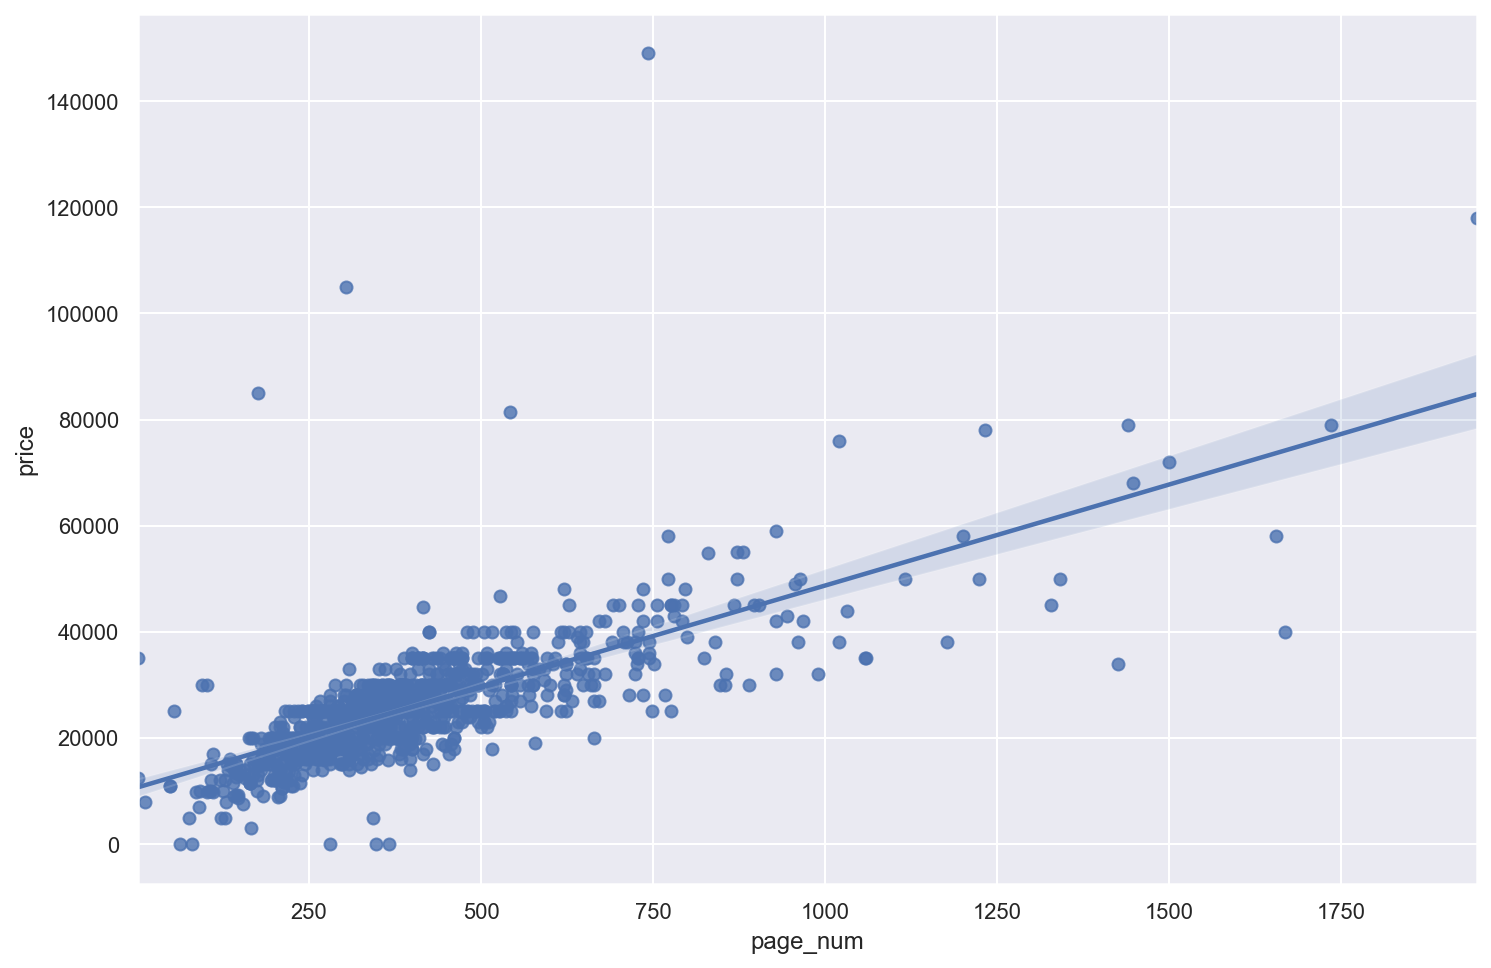

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_data,)
plt.show()

In [67]:
raw_data[raw_data['price'] > 140000]

title   price publisher  \
861  CODECADEMY.COM PYTHON 2 가이드북 (인공지능 10만 양병 프로젝트)  149000     오미글로벌   

           isbn                                               link  page_num  
861  1196250243  http://book.naver.com/bookdb/book_detail.php?b...       742

In [68]:
raw_data['publisher'].value_counts()

에이콘출판       179
한빛미디어       106
위키북스         83
길벗           41
제이펍          40
           ... 
한성대학교출판부      1
에피스테메         1
책읽는수요일        1
경문사           1
와우북스          1
Name: publisher, Length: 188, dtype: int64

In [69]:
len(raw_data['publisher'].unique())

188

In [71]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = "/Library/Fonts/Arial Unicode.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

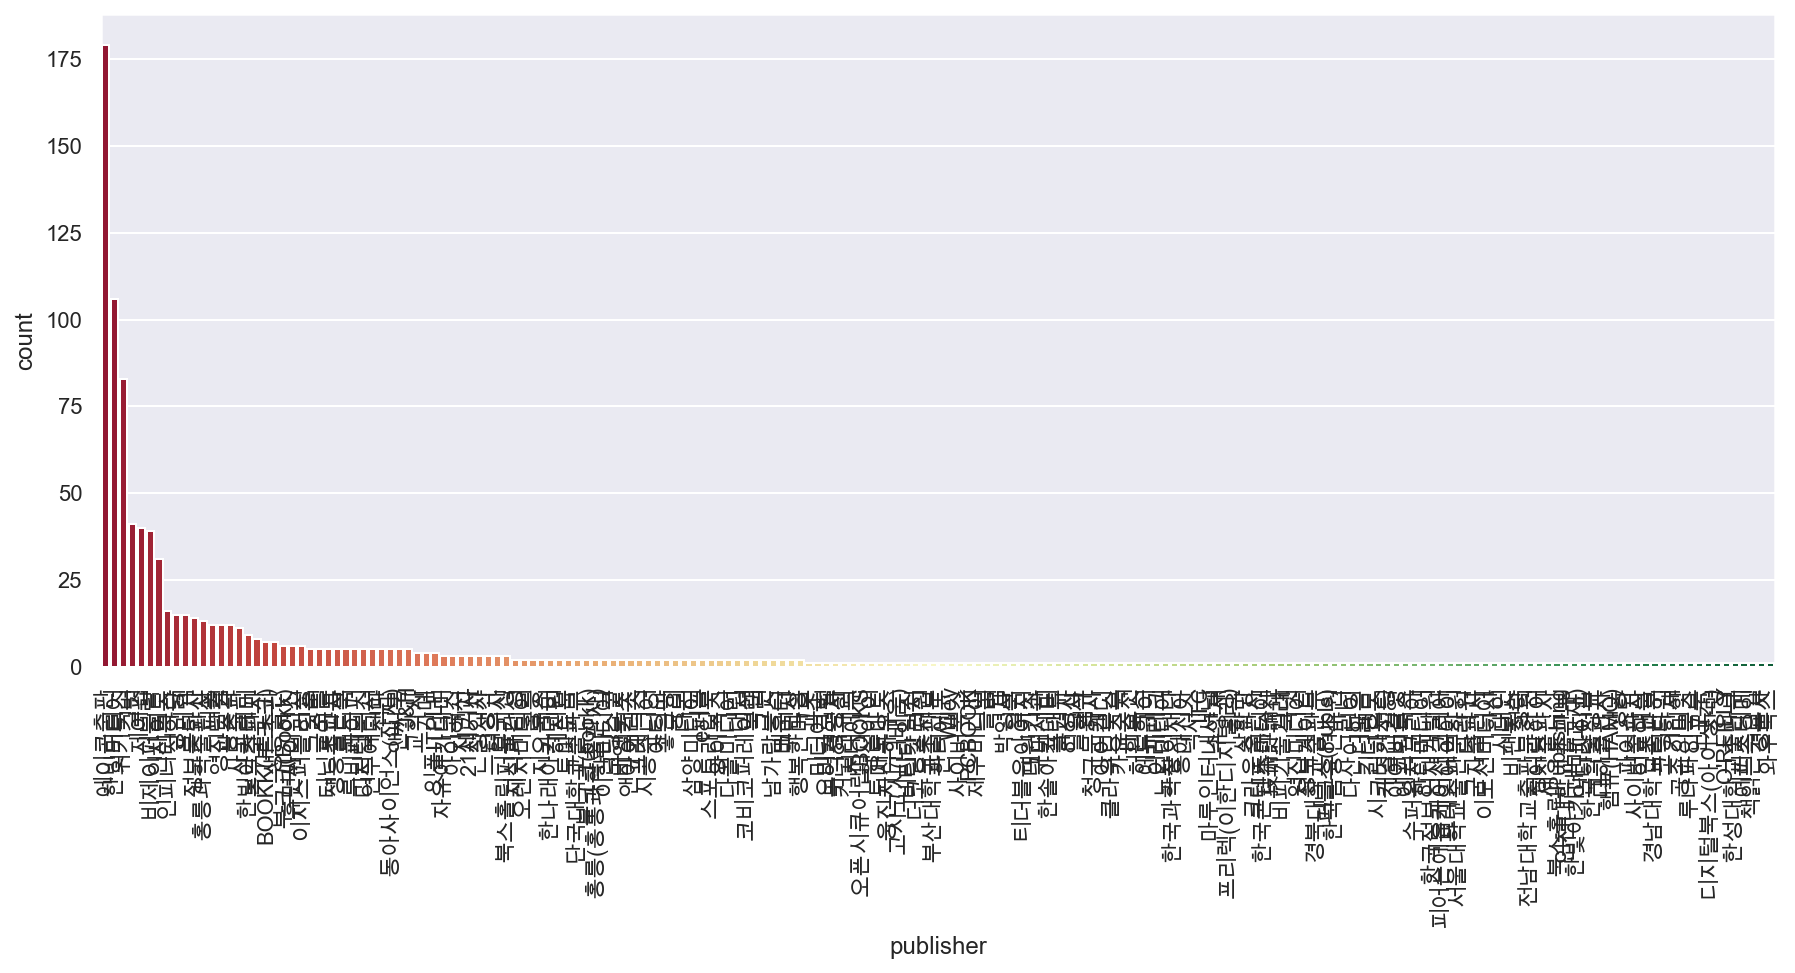

In [73]:
plt.figure(figsize=(15,6))
sns.countplot('publisher', data=raw_data, palette="RdYlGn", order=raw_data['publisher'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

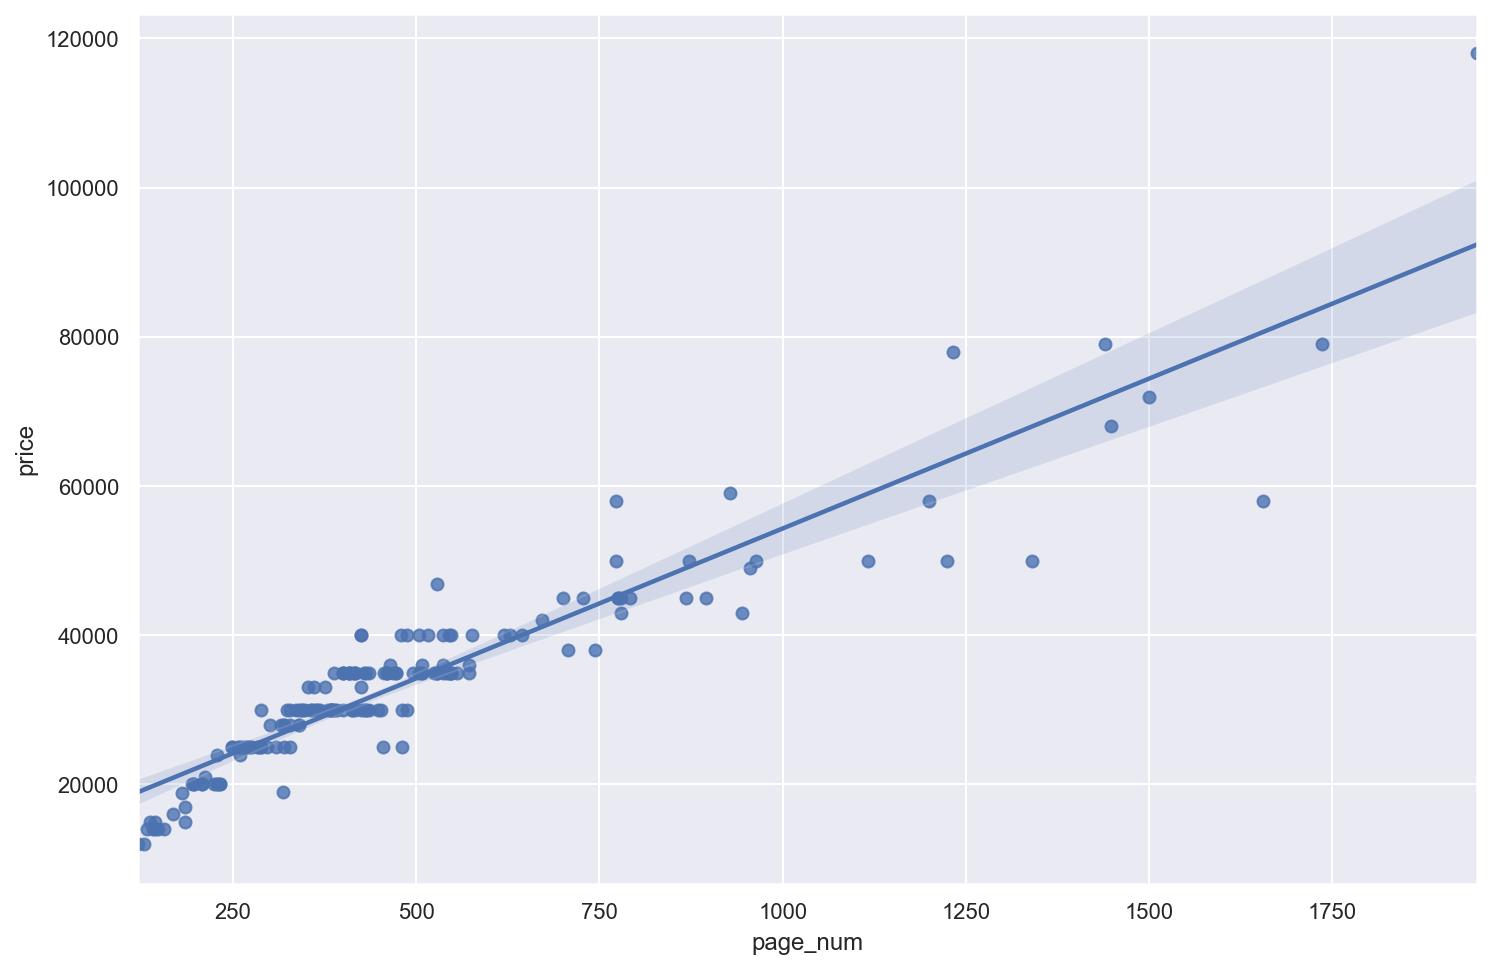

In [74]:
raw_1 = raw_data[raw_data['publisher']=='에이콘출판']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_1)
plt.show()

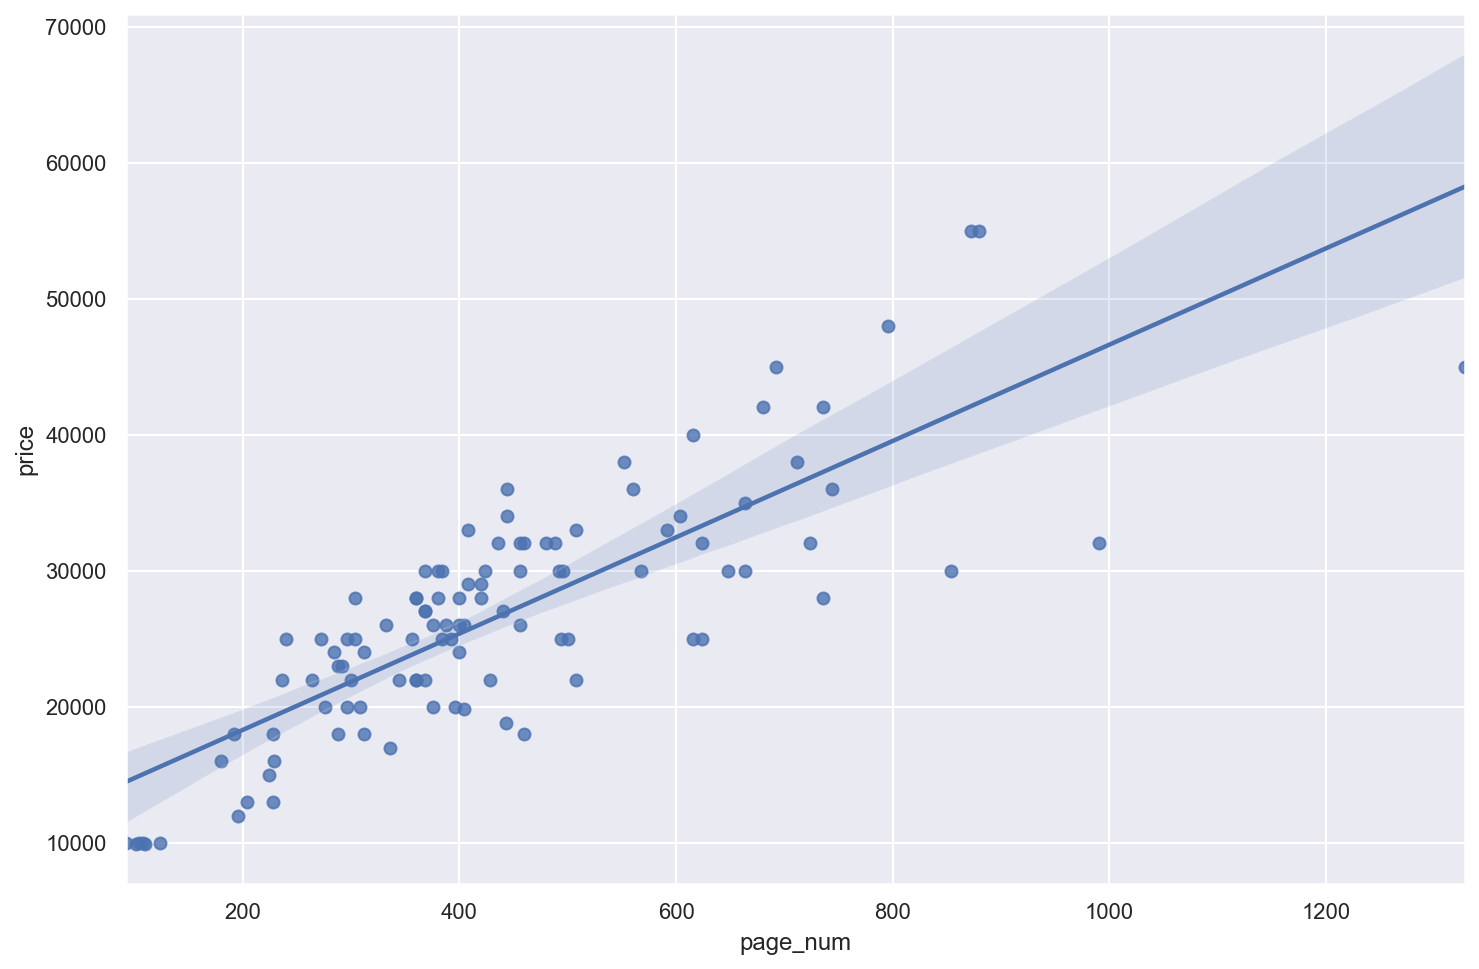

In [75]:
raw_2 = raw_data[raw_data['publisher']=='한빛미디어']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_2)
plt.show()

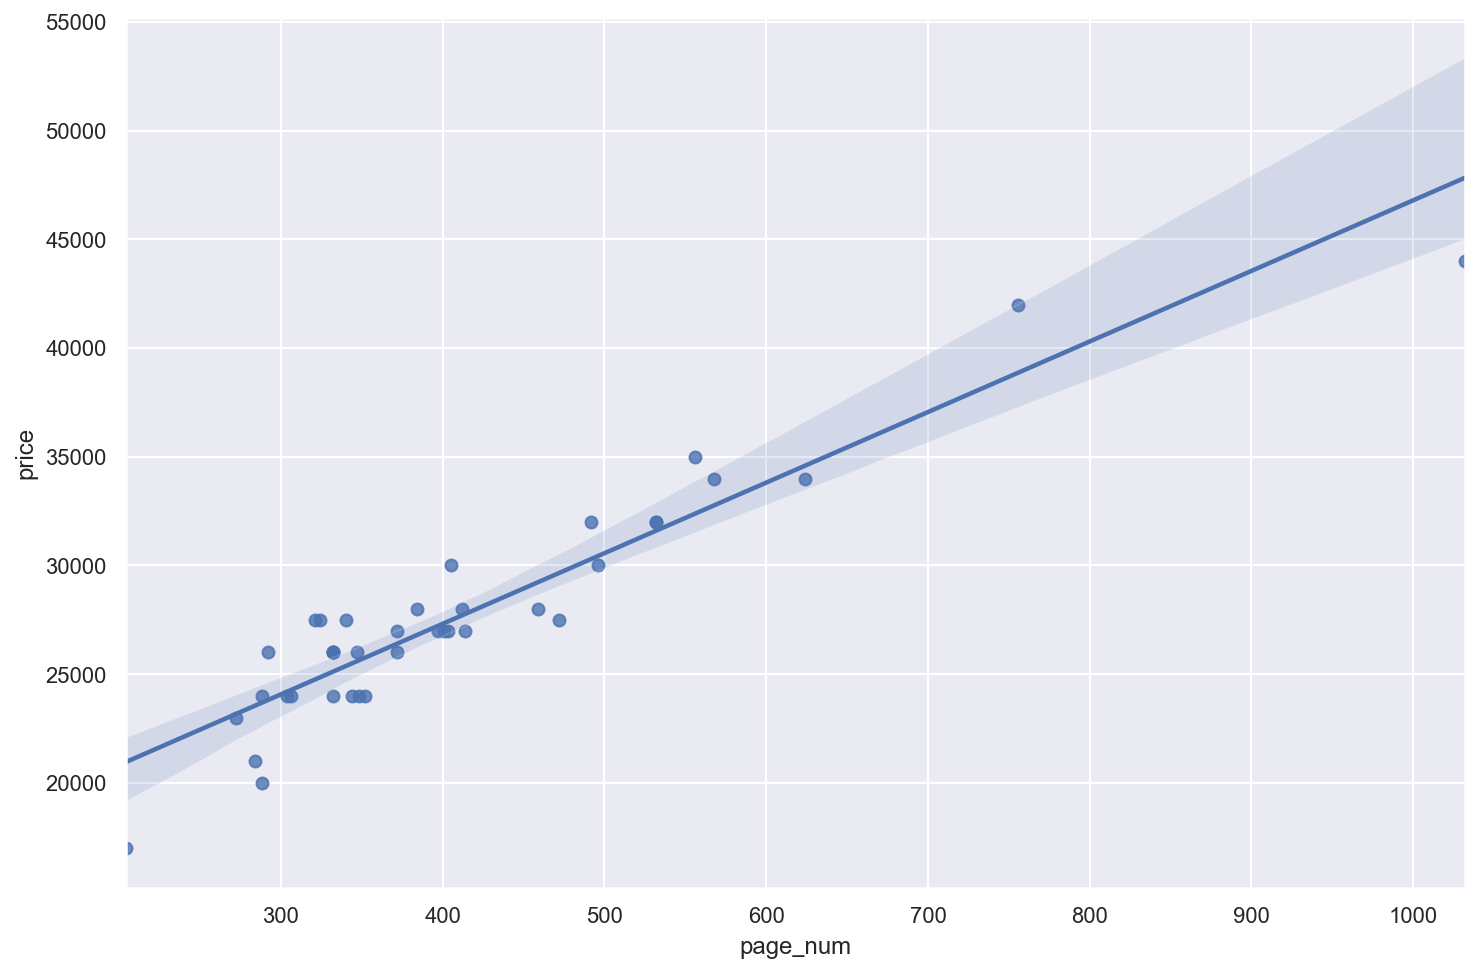

In [76]:
raw_3 = raw_data[raw_data['publisher']=='비제이퍼블릭']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_3)
plt.show()

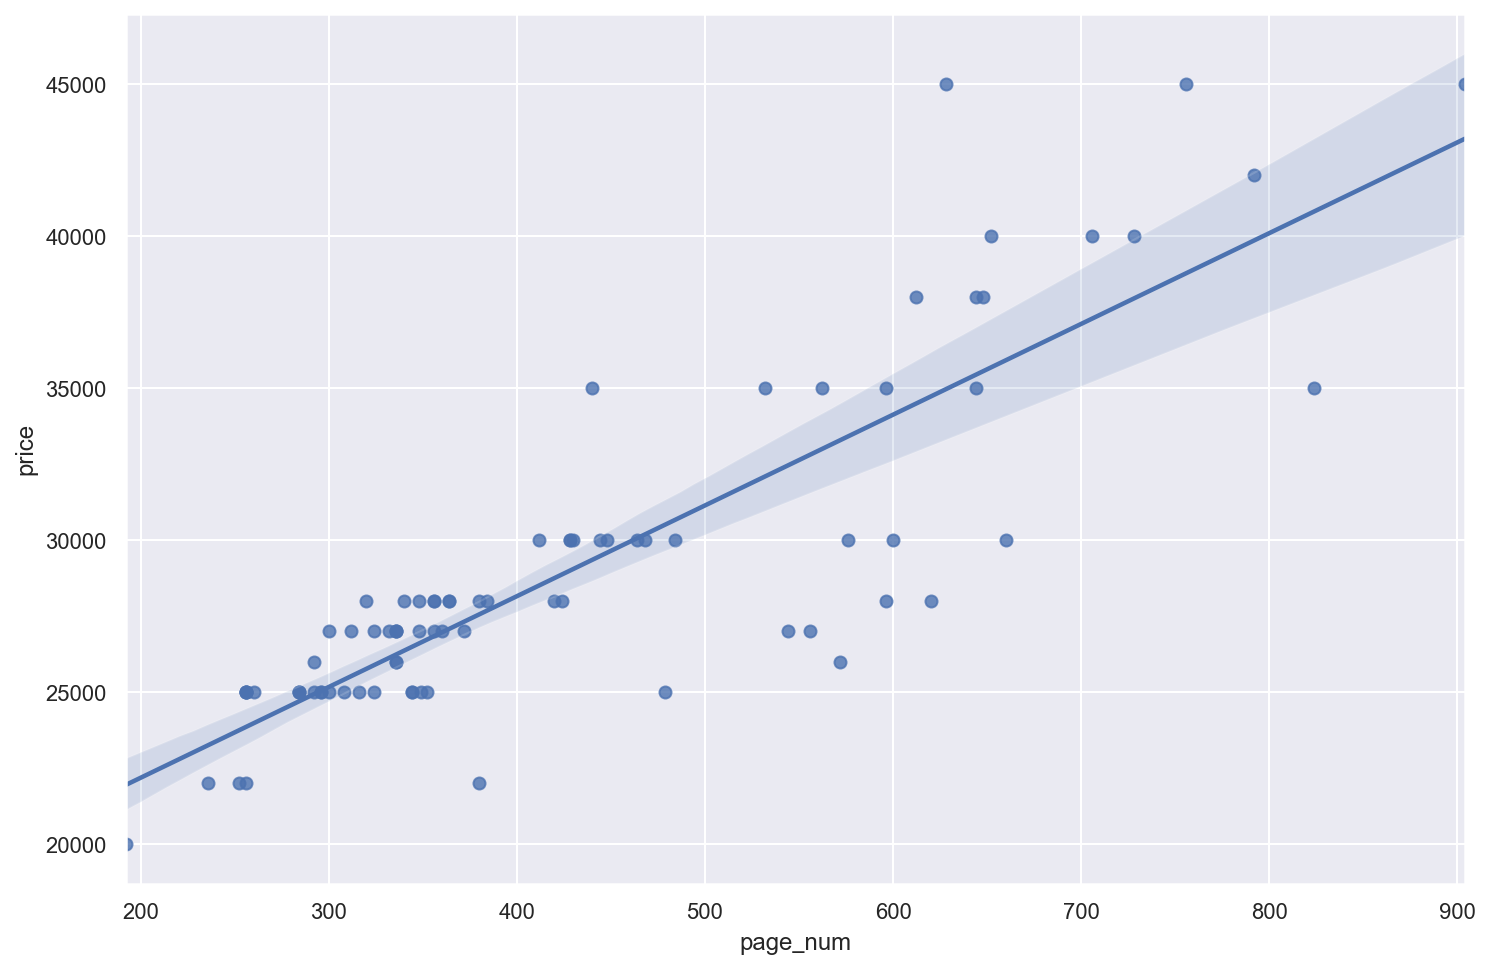

In [77]:
raw_4 = raw_data[raw_data['publisher']=='위키북스']

plt.figure(figsize=(12,8))
sns.regplot(x='page_num', y='price', data=raw_4)
plt.show()

In [78]:
import plotly.express as px

px.box(raw_data, y='price')

In [79]:
from sklearn.model_selection import train_test_split

X = raw_data['page_num'].values
y = raw_data['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [80]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  8245.045069198468
RMSE of Test Data :  5891.352108264345


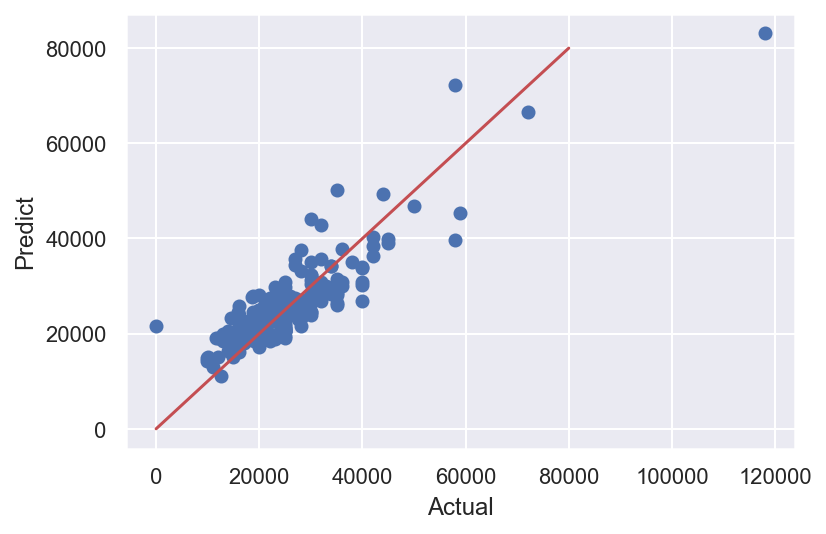

In [83]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,80000], [0,80000], 'r')
plt.show()

In [84]:
X = raw_1['page_num'].values
y = raw_1['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [85]:
reg.fit(X_train, y_train)

LinearRegression()

In [86]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print("RMSE of Train Data : ", rmse_tr)
print("RMSE of Test Data : ", rmse_test)

RMSE of Train Data :  4360.650600597354
RMSE of Test Data :  6797.398862700611


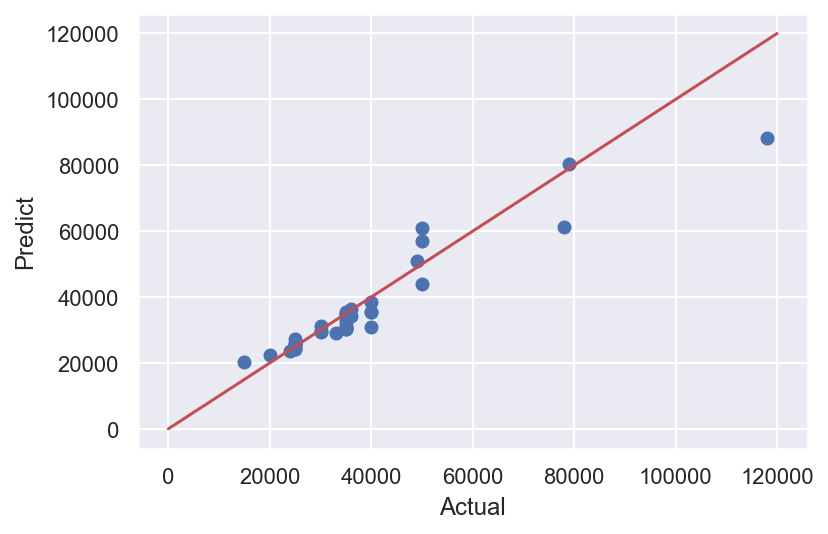

In [87]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual")
plt.ylabel("Predict")
plt.plot([0,120000], [0,120000], 'r')
plt.show()